<a href="https://colab.research.google.com/github/FGalvao77/Conhecendo-a-biblioteca-LAZYPREDICT/blob/main/Conhecendo_a_biblioteca_LAZYPREDICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conhecendo a biblioteca `LAZYPREDICT`**

---




**Introdução**

- _Como selecionar o melhor modelo para solução de um probelma específico de Ciência de Dados?_ 🤔 

 - Primeiro, devemos importar todas as bibliotecas, ajustar os parâmetros, comparar todos os modelos e, em seguida, verificar o desempenho do modelo usando objetivos diferentes.<br> Esse processo leva muito tempo e, para evitar todas essas etapas é que temos o `Lazy Predict`.

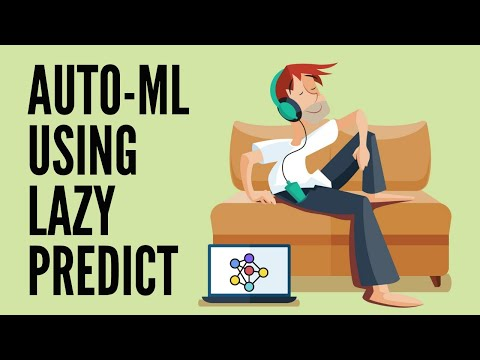

**O que é Lazy Predict?**

É uma das melhores bibliotecas python que o ajuda a semi-automatizar sua tarefa de aprendizado de máquina. Ele constrói muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem qualquer ajuste de parâmetro.

Suponha que temos uma declaração de problema e realmente precisamos aplicar todos os modelos naquele conjunto de dados específico e temos que analisar como está o desempenho de nosso modelo básico. Aqui, modelo básico significa “Modelo sem parâmetros”. Portanto, podemos fazer essa tarefa diretamente usando o Lazy Predict. Depois de obter toda a precisão, podemos escolher os 5 principais modelos e, em seguida, aplicar o ajuste de hiperparâmetros a eles. Ele fornece um `Lazy Classifier` _para resolver o problema de classificação_ e `Lazy Regressor` _para resolver o problema de regressão_.

Para se aprofundar nesta biblioteca, você pode consultar a documentação [aqui](https://lazypredict.readthedocs.io/en/latest/).

Iremos aplicar a biblioteca em problemas de classificação e de regressão.

Melhor forma de aprender e praticando. Então vamos nessa!!!

In [1]:
# instalando a biblioteca
!pip install lazypredict

In [3]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

## **Classificação**

**Conhecendo o problema:**
- Construir um modelo de classificação para a predição de câncer de mama.

**Descrição do conjunto de dados:**
- Utlizaremos o conjunto de dados do câncer de mama, no qual devemos prever se uma pessoa sofre de câncer ou não.



In [4]:
# importando o conjunto de dados de câncer de mama da biblioteca do scikit-learn do módulo "datasets"
from sklearn.datasets import load_breast_cancer

In [5]:
# instanciando o conjunto de dados na variável "breast_cancer"
breast_cancer = load_breast_cancer()

In [6]:
# visualizando o tipo do objeto
type(breast_cancer)

sklearn.utils.Bunch

In [7]:
# visualizando o conjunto de dados
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

> Perceba que, é um dicionário contendo os dados.

In [8]:
# com a função ".DESCR" podemos visualizar o conjunto de dados de forma mais estruturada
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Informação dos atributos:**
- raio (média das distâncias do centro aos pontos do perímetro).
- textura (desvio padrão dos valores da escala de cinza).
perímetro.
área.
- suavidade (variação local nos comprimentos dos raios).
- compacidade (perímetro ^ 2 / área - 1,0).
- concavidade (severidade das porções côncavas do contorno).
- pontos côncavos (número de porções côncavas do contorno).
simetria.
- dimensão fractal (“aproximação do litoral” - 1).

A média, o erro padrão e o “pior” ou maior (média dos três maiores valores) desses recursos foram calculados para cada imagem, resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo 13 é o raio SE, o campo 23 é o pior raio. Todos os valores de recursos são recodificados com quatro dígitos significativos. Os valores de atributo ausentes são nenhum. <br>A distribuição das classes é 357 benigna e 212 maligna.

`Benigno` significa que uma pessoa não está sofrendo de câncer, enquanto, `maligno` significa que uma pessoa está sofrendo de câncer.

In [9]:
# instanciando o dicionário de dados em um dataframe
cancer = pd.DataFrame(
    breast_cancer.data,
    columns=breast_cancer.feature_names
)

# inserindo a variável alvo no dataframe criado
cancer['target'] = breast_cancer.target

In [10]:
# visualizando as 5 primeiras linhas
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# informações gerais
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# visualizando a distribuição das observações presentes na variável alvo
print(
    cancer['target'].unique(),
    cancer['target'].value_counts(),
    sep='\n\n'
)

[0 1]

1    357
0    212
Name: target, dtype: int64


In [13]:
# instanciando as variáveis explicativas e a resposta
X = cancer.drop('target', axis=1)
y = cancer['target']

In [14]:
# importando a biblioteca para realizar o particionamento dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [15]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3, # reservando 30% para teste
                                                random_state=42)

In [16]:
# importando a função de classificação da biblioteca "lazypredict" 
# import lazypredict
from lazypredict.Supervised import LazyClassifier

In [17]:
# instanciando o classificador
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [18]:
# aplicando o "fit" nos dados de treino e teste
models, predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)

100%|██████████| 29/29 [00:01<00:00, 15.81it/s]


In [19]:
# visualizando os resultados
display(
    models, 
    predictions
)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,0.97,0.97,0.04
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.23
SVC,0.96,0.96,0.96,0.96,0.03
SGDClassifier,0.95,0.96,0.96,0.96,0.03
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.05
Perceptron,0.95,0.96,0.96,0.96,0.03
PassiveAggressiveClassifier,0.95,0.96,0.96,0.96,0.03
LinearSVC,0.96,0.96,0.96,0.96,0.06
LGBMClassifier,0.96,0.96,0.96,0.96,0.06


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,0.97,0.97,0.04
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.23
SVC,0.96,0.96,0.96,0.96,0.03
SGDClassifier,0.95,0.96,0.96,0.96,0.03
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.05
Perceptron,0.95,0.96,0.96,0.96,0.03
PassiveAggressiveClassifier,0.95,0.96,0.96,0.96,0.03
LinearSVC,0.96,0.96,0.96,0.96,0.06
LGBMClassifier,0.96,0.96,0.96,0.96,0.06


In [20]:
# visualizando os 10 primeiros modelos - dados de treino
models[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,0.97,0.97,0.04
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.23
SVC,0.96,0.96,0.96,0.96,0.03
SGDClassifier,0.95,0.96,0.96,0.96,0.03
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.05
Perceptron,0.95,0.96,0.96,0.96,0.03
PassiveAggressiveClassifier,0.95,0.96,0.96,0.96,0.03
LinearSVC,0.96,0.96,0.96,0.96,0.06
LGBMClassifier,0.96,0.96,0.96,0.96,0.06


In [21]:
# visualizando os 10 primeiros modelos - dados de teste
predictions[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,0.97,0.97,0.04
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.23
SVC,0.96,0.96,0.96,0.96,0.03
SGDClassifier,0.95,0.96,0.96,0.96,0.03
CalibratedClassifierCV,0.96,0.96,0.96,0.96,0.05
Perceptron,0.95,0.96,0.96,0.96,0.03
PassiveAggressiveClassifier,0.95,0.96,0.96,0.96,0.03
LinearSVC,0.96,0.96,0.96,0.96,0.06
LGBMClassifier,0.96,0.96,0.96,0.96,0.06


## **Regressão**

**Conhecendo o problema:**
- Criar um modelo de regressão para predizer os preços imobiliários de casas.  

**Descrição do conjunto de dados:**
 - Usaremos o conjunto de dados Boston House Price Prediction, onde em que cada registro no banco de dados descreve um subúrbio ou cidade de Boston. Os dados foram extraídos da Área Estatística Metropolitana Padrão de Boston em 1970. O atributo é definido como segue (retirado do UCI Machine Learning Repository1)



In [22]:
# importando o conjunto de dados de valores de casas da biblioteca do scikit-learn do módulo "datasets"
from sklearn.datasets import load_boston

In [23]:
# instanciando o conjunto de dados na variável "boston"
boston = load_boston()

In [24]:
# visualizando o tipo do objeto
type(boston)

sklearn.utils.Bunch

In [25]:
# visualizando o conjunto de dados
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

> Perceba novamente que, é um dicionário contendo os dados.

In [26]:
# com a função ".DESCR" podemos visualizar o conjunto de dados de forma mais estruturada
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Informação dos atributos:**
- CRIM: taxa de crime per capita por cidade.
- ZN: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
- INDUS: proporção de acres de negócios não varejistas por cidade.
- CHAS: variável dummy de Charles River (= 1 se a área delimita o rio; 0 caso contrário).
- NOX: concentração de óxido nítrico (partes por 10 milhões).
- RM: número médio de cômodos por moradia.
- IDADE: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
- DIS: distâncias ponderadas para cinco centros de empregos de Boston.
- RAD: índice de acessibilidade às rodovias radiais.
- IMPOSTO: taxa de imposto sobre a propriedade de valor total por $ 10.000$.
- PTRATIO: proporção professor-aluno por cidade.
- B: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade.
- LSAT: status inferior da população.
- MEDV: Valor médio das casas ocupadas pelo proprietário em _US$ 1.000_.

Podemos ver que os atributos de entrada possuem uma mistura de unidades (escalas).

In [27]:
# instanciando o dicionário de dados em um dataframe
houses = pd.DataFrame(
    boston.data,
    columns=boston.feature_names
)

houses['MEDV'] = boston.target

In [28]:
# visualizando as 5 primeiras linhas
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [29]:
# informações gerais
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [30]:
# contabilizando o total e os valores mais presentes na variável alvo
print(
    houses['MEDV'].count(),
    houses['MEDV'].value_counts(),
    sep='\n\n'
)

506

50.00    16
25.00     8
23.10     7
21.70     7
22.00     7
         ..
12.80     1
29.90     1
9.60      1
36.10     1
13.00     1
Name: MEDV, Length: 229, dtype: int64


In [31]:
# importando a função para gerar dados aleatórios
from sklearn.utils import shuffle

In [32]:
# instanciando as variáveis explicativas e a resposta
X, y = shuffle(boston.data, boston.target, random_state=42)
offset = int(X.shape[0] * 0.7)

In [33]:
# instanciando os dados de treino e de teste
Xtrain, ytrain = X[:offset], y[:offset]
Xtest, ytest = X[offset:], y[offset:]

In [34]:
# contabilizando a quantidade de dados em cada variável de treino e teste
len(Xtrain), len(ytrain), len(Xtest), len(ytest)

(354, 354, 152, 152)

In [35]:
# importando a função de regressão da biblioteca "lazypredict" 
from lazypredict.Supervised import LazyRegressor

In [36]:
# instanciando o regressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [37]:
# aplicando o "fit" nos dados de treino e teste
models, predictions = reg.fit(Xtrain, Xtest, ytrain, ytest)

100%|██████████| 42/42 [00:06<00:00,  6.95it/s]


In [38]:
# visualizando os resultados
display(
    models, 
    predictions
)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,2.86,0.16
ExtraTreesRegressor,0.88,0.89,3.02,0.22
RandomForestRegressor,0.87,0.89,3.06,0.76
XGBRegressor,0.87,0.88,3.08,0.58
BaggingRegressor,0.86,0.87,3.21,0.05
LGBMRegressor,0.85,0.86,3.38,0.59
HistGradientBoostingRegressor,0.84,0.86,3.44,0.45
AdaBoostRegressor,0.83,0.84,3.58,0.15
PoissonRegressor,0.76,0.78,4.23,0.03


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,2.86,0.16
ExtraTreesRegressor,0.88,0.89,3.02,0.22
RandomForestRegressor,0.87,0.89,3.06,0.76
XGBRegressor,0.87,0.88,3.08,0.58
BaggingRegressor,0.86,0.87,3.21,0.05
LGBMRegressor,0.85,0.86,3.38,0.59
HistGradientBoostingRegressor,0.84,0.86,3.44,0.45
AdaBoostRegressor,0.83,0.84,3.58,0.15
PoissonRegressor,0.76,0.78,4.23,0.03


In [39]:
# os 10 primeiros modelos - dados de treino
models[:10]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,2.86,0.16
ExtraTreesRegressor,0.88,0.89,3.02,0.22
RandomForestRegressor,0.87,0.89,3.06,0.76
XGBRegressor,0.87,0.88,3.08,0.58
BaggingRegressor,0.86,0.87,3.21,0.05
LGBMRegressor,0.85,0.86,3.38,0.59
HistGradientBoostingRegressor,0.84,0.86,3.44,0.45
AdaBoostRegressor,0.83,0.84,3.58,0.15
PoissonRegressor,0.76,0.78,4.23,0.03


In [40]:
# os 10 primeiros modelos - dados de teste
predictions[:10]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.89,0.90,2.86,0.16
ExtraTreesRegressor,0.88,0.89,3.02,0.22
RandomForestRegressor,0.87,0.89,3.06,0.76
XGBRegressor,0.87,0.88,3.08,0.58
BaggingRegressor,0.86,0.87,3.21,0.05
LGBMRegressor,0.85,0.86,3.38,0.59
HistGradientBoostingRegressor,0.84,0.86,3.44,0.45
AdaBoostRegressor,0.83,0.84,3.58,0.15
PoissonRegressor,0.76,0.78,4.23,0.03


De forma análoga, abaixo foi realizado as etapas aplicadas no problema de classificação de câncer.

In [41]:
# instanciando as variáveis explicativas e a resposta
X = houses.drop('MEDV', axis=1)
y = houses['MEDV']

In [42]:
# importando a biblioteca para realizar o particionamento dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [43]:
# instanciando os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.3,
                                                random_state=42)

In [44]:
# importando a função de regressão da biblioteca "lazypredict" 
from lazypredict.Supervised import LazyRegressor

In [54]:
# instanciando o regressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [55]:
# aplicando o "fit" nos dados de treino e teste
models, predictions = reg.fit(Xtrain, Xtest, ytrain, ytest)

100%|██████████| 42/42 [00:02<00:00, 15.61it/s]


In [47]:
# visualizando os resultados
display(
    models, 
    predictions
)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.84,3.70,0.37
GradientBoostingRegressor,0.83,0.84,3.72,0.25
RandomForestRegressor,0.82,0.83,3.82,0.71
LGBMRegressor,0.80,0.81,4.07,0.08
HistGradientBoostingRegressor,0.79,0.80,4.13,2.45
BaggingRegressor,0.79,0.80,4.18,0.12
AdaBoostRegressor,0.78,0.79,4.25,0.28
PoissonRegressor,0.77,0.78,4.39,0.07
XGBRegressor,0.75,0.76,4.55,0.22


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.84,3.70,0.37
GradientBoostingRegressor,0.83,0.84,3.72,0.25
RandomForestRegressor,0.82,0.83,3.82,0.71
LGBMRegressor,0.80,0.81,4.07,0.08
HistGradientBoostingRegressor,0.79,0.80,4.13,2.45
BaggingRegressor,0.79,0.80,4.18,0.12
AdaBoostRegressor,0.78,0.79,4.25,0.28
PoissonRegressor,0.77,0.78,4.39,0.07
XGBRegressor,0.75,0.76,4.55,0.22


In [48]:
# os 10 primeiros modelos - dados de treino
models[:10]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.84,3.70,0.37
GradientBoostingRegressor,0.83,0.84,3.72,0.25
RandomForestRegressor,0.82,0.83,3.82,0.71
LGBMRegressor,0.80,0.81,4.07,0.08
HistGradientBoostingRegressor,0.79,0.80,4.13,2.45
BaggingRegressor,0.79,0.80,4.18,0.12
AdaBoostRegressor,0.78,0.79,4.25,0.28
PoissonRegressor,0.77,0.78,4.39,0.07
XGBRegressor,0.75,0.76,4.55,0.22


In [49]:
# os 10 primeiros modelos - dados de teste
predictions[:10]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.83,0.84,3.70,0.37
GradientBoostingRegressor,0.83,0.84,3.72,0.25
RandomForestRegressor,0.82,0.83,3.82,0.71
LGBMRegressor,0.80,0.81,4.07,0.08
HistGradientBoostingRegressor,0.79,0.80,4.13,2.45
BaggingRegressor,0.79,0.80,4.18,0.12
AdaBoostRegressor,0.78,0.79,4.25,0.28
PoissonRegressor,0.77,0.78,4.39,0.07
XGBRegressor,0.75,0.76,4.55,0.22


## **Conclusão**

Esta biblioteca ajustará nossos dados em diferentes modelos de base (baseline). <br>A partir desses modelos básicos, selecionaremos os 10 ou 5 melhores modelos e, em seguida, ajustaremos os parâmetros e obteremos maior precisão. Use esta biblioteca na primeira iteração que significa antes de ajustar os parâmetros de hipertensão. Também funciona para python _versão > 3.6_. 

Para aplicação do `LazyPredict` pode ser necessário muito poder computacional, por isso use o **Google Colab**.